Implementation in PyTorch

In [ ]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import torch.optim as optim

random_seed = 1 # or any of your favorite number 
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
input_size = 784 # 28x28
hidden_size1 = 300
hidden_size2 = 200
num_classes = 10
num_epochs = 20
batch_size = 128
learning_rate = 0.1

In [ ]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=True, 
                                      transform=transforms.ToTensor(),  
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor()) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        # self.input_size = input_size
        # self.l1 = nn.Linear(input_size, hidden_size) 
        # self.relu = nn.ReLU()
        # self.l2 = nn.Linear(hidden_size, num_classes)
        self.linear1 = nn.Linear(784, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, 10)
    def forward(self, x):
        # out = self.l1(x)
        # out = self.relu(out)
        # out = self.l2(out)
        # # no activation and no softmax at the end
        # return out
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        # x = torch.softmax(x, dim=0)
        return x

In [ ]:
device = 'cuda'
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
summary = {}
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    loss_epoch = []
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        if (i+1) % 100 == 0:
          print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 
          loss_epoch.append(loss.item())
    summary[epoch+1] = sum(loss_epoch) / len(loss_epoch)

Epoch [1/20], Step[100/469], Loss: 0.4814
Epoch [1/20], Step[200/469], Loss: 0.1851
Epoch [1/20], Step[300/469], Loss: 0.3006
Epoch [1/20], Step[400/469], Loss: 0.1826
Epoch [2/20], Step[100/469], Loss: 0.2667
Epoch [2/20], Step[200/469], Loss: 0.1845
Epoch [2/20], Step[300/469], Loss: 0.2468
Epoch [2/20], Step[400/469], Loss: 0.3106
Epoch [3/20], Step[100/469], Loss: 0.2227
Epoch [3/20], Step[200/469], Loss: 0.3458
Epoch [3/20], Step[300/469], Loss: 0.2225
Epoch [3/20], Step[400/469], Loss: 0.4759
Epoch [4/20], Step[100/469], Loss: 0.2310
Epoch [4/20], Step[200/469], Loss: 0.2537
Epoch [4/20], Step[300/469], Loss: 0.1646
Epoch [4/20], Step[400/469], Loss: 0.1508
Epoch [5/20], Step[100/469], Loss: 0.2097
Epoch [5/20], Step[200/469], Loss: 0.2513
Epoch [5/20], Step[300/469], Loss: 0.2265
Epoch [5/20], Step[400/469], Loss: 0.2785
Epoch [6/20], Step[100/469], Loss: 0.1417
Epoch [6/20], Step[200/469], Loss: 0.4504
Epoch [6/20], Step[300/469], Loss: 0.2421
Epoch [6/20], Step[400/469], Loss:

In [ ]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in test_loader:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         # max returns (value ,index)
         _, predicted = torch.max(outputs.data, 1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item() 
         n_errors = n_samples - n_correct
         acc = 100.0 * n_correct / n_samples
         err = 100.0 * n_errors / n_samples
     print(f'Accuracy of the network on the 10000 test images: {acc} %') 
     print(f'Error rate of the network on the 10000 test images: {err} %') 

Accuracy of the network on the 10000 test images: 95.11 %
Error rate of the network on the 10000 test images: 4.89 %


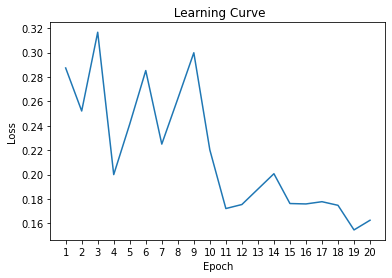

In [ ]:
import pdb

# importing the required module
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
  
# naming the x axis
plt.xlabel('Epoch')
# naming the y axis
plt.ylabel('Loss')
  
# # giving a title to my graph
plt.title(' Learning Curve')

lists = sorted(summary.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.plot(x, y)
plt.show()

b) initialize the weights randomly
between -1 and 1

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.uniform_(m.weight, -1, 1)
        m.bias.data.fill_(0.01)

In [ ]:
device = 'cuda'
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
model.apply(init_weights)

NeuralNet(
  (linear1): Linear(in_features=784, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
summary = {}
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    loss_epoch = []
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        if (i+1) % 100 == 0:
          print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 
          loss_epoch.append(loss.item())
    summary[epoch+1] = sum(loss_epoch) / len(loss_epoch)

Epoch [1/20], Step[100/469], Loss: 1.2887
Epoch [1/20], Step[200/469], Loss: 0.8820
Epoch [1/20], Step[300/469], Loss: 0.7172
Epoch [1/20], Step[400/469], Loss: 0.6313
Epoch [2/20], Step[100/469], Loss: 0.5452
Epoch [2/20], Step[200/469], Loss: 0.6673
Epoch [2/20], Step[300/469], Loss: 0.5584
Epoch [2/20], Step[400/469], Loss: 0.4563
Epoch [3/20], Step[100/469], Loss: 0.4881
Epoch [3/20], Step[200/469], Loss: 0.2893
Epoch [3/20], Step[300/469], Loss: 0.2649
Epoch [3/20], Step[400/469], Loss: 0.5139
Epoch [4/20], Step[100/469], Loss: 0.3386
Epoch [4/20], Step[200/469], Loss: 0.3194
Epoch [4/20], Step[300/469], Loss: 0.3667
Epoch [4/20], Step[400/469], Loss: 0.2966
Epoch [5/20], Step[100/469], Loss: 0.2777
Epoch [5/20], Step[200/469], Loss: 0.3943
Epoch [5/20], Step[300/469], Loss: 0.4192
Epoch [5/20], Step[400/469], Loss: 0.3062
Epoch [6/20], Step[100/469], Loss: 0.2725
Epoch [6/20], Step[200/469], Loss: 0.3247
Epoch [6/20], Step[300/469], Loss: 0.1852
Epoch [6/20], Step[400/469], Loss:

In [ ]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in test_loader:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         # max returns (value ,index)
         _, predicted = torch.max(outputs.data, 1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item() 
         n_errors = n_samples - n_correct
         acc = 100.0 * n_correct / n_samples
         err = 100.0 * n_errors / n_samples
     print(f'Accuracy of the network on the 10000 test images: {acc} %') 
     print(f'Error rate of the network on the 10000 test images: {err} %') 

Accuracy of the network on the 10000 test images: 93.81 %
Error rate of the network on the 10000 test images: 6.19 %


a) all weights initialized to 0

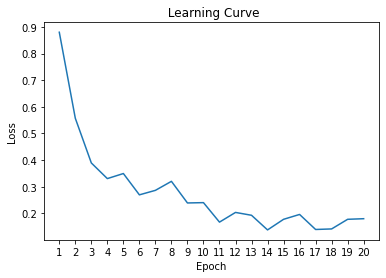

In [ ]:
import pdb

# importing the required module
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
  
# naming the x axis
plt.xlabel('Epoch')
# naming the y axis
plt.ylabel('Loss')
  
# # giving a title to my graph
plt.title(' Learning Curve')

lists = sorted(summary.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.plot(x, y)
plt.show()

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.uniform_(m.weight, 0, 0)
        m.bias.data.fill_(0)

In [ ]:
device = 'cuda'
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
model.apply(init_weights)

NeuralNet(
  (linear1): Linear(in_features=784, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
summary = {}
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    loss_epoch = []
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        if (i+1) % 100 == 0:
          print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 
          loss_epoch.append(loss.item())
    summary[epoch+1] = sum(loss_epoch) / len(loss_epoch)

Epoch [1/20], Step[100/469], Loss: 2.3119
Epoch [1/20], Step[200/469], Loss: 2.3063
Epoch [1/20], Step[300/469], Loss: 2.3468
Epoch [1/20], Step[400/469], Loss: 2.3321
Epoch [2/20], Step[100/469], Loss: 2.3165
Epoch [2/20], Step[200/469], Loss: 2.3090
Epoch [2/20], Step[300/469], Loss: 2.3331
Epoch [2/20], Step[400/469], Loss: 2.3093
Epoch [3/20], Step[100/469], Loss: 2.2954
Epoch [3/20], Step[200/469], Loss: 2.2982
Epoch [3/20], Step[300/469], Loss: 2.3063
Epoch [3/20], Step[400/469], Loss: 2.2953
Epoch [4/20], Step[100/469], Loss: 2.3081
Epoch [4/20], Step[200/469], Loss: 2.3292
Epoch [4/20], Step[300/469], Loss: 2.3069
Epoch [4/20], Step[400/469], Loss: 2.3085
Epoch [5/20], Step[100/469], Loss: 2.2940
Epoch [5/20], Step[200/469], Loss: 2.3103
Epoch [5/20], Step[300/469], Loss: 2.2929
Epoch [5/20], Step[400/469], Loss: 2.2966
Epoch [6/20], Step[100/469], Loss: 2.2969
Epoch [6/20], Step[200/469], Loss: 2.3074
Epoch [6/20], Step[300/469], Loss: 2.3018
Epoch [6/20], Step[400/469], Loss:

In [ ]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in test_loader:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         # max returns (value ,index)
         _, predicted = torch.max(outputs.data, 1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item() 
         n_errors = n_samples - n_correct
         acc = 100.0 * n_correct / n_samples
         err = 100.0 * n_errors / n_samples
     print(f'Accuracy of the network on the 10000 test images: {acc} %') 
     print(f'Error rate of the network on the 10000 test images: {err} %') 

Accuracy of the network on the 10000 test images: 36.76 %
Error rate of the network on the 10000 test images: 63.24 %


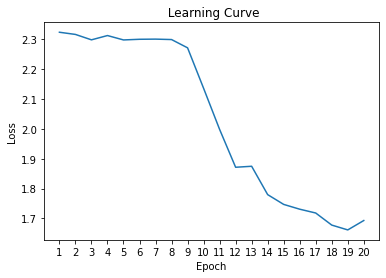

In [ ]:
import pdb

# importing the required module
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
  
# naming the x axis
plt.xlabel('Epoch')
# naming the y axis
plt.ylabel('Loss')
  
# # giving a title to my graph
plt.title(' Learning Curve')

lists = sorted(summary.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.plot(x, y)
plt.show()